In [1]:
import pandas as pd
import gender_guesser.detector as gender
import seaborn as sns
%matplotlib inline

In [2]:
#llegim el nostre fitxer
autoris = pd.read_excel('VeriDades.xlsx')

#ens assegurem que la columna on hi ha els noms sigui un string, perquè ara hi haurem de treballar
autoris["Autor/a"] = autoris["Autor/a"].astype("string")

In [4]:
''' Ara el que volem és poder separar el nom del cognom (i esciure-ho en una nova columna per després poder 
fer la distinció home/dona amb el gender guesser). Les colaboracions han estat escrites com:
grup, collaboration (així que a l'hora de fer el gender guessing s'haurà de fer un "if collab in nom, gender = collab" 
per tal que no es classifiqui com a unknown sino com a collab, perquè farem distinció entre noms no classificables
i colaboracions) '''

i=0
while i<len(autoris.index):
    autoris.loc[i,'Noms'] = (autoris.loc[i,'Autor/a']).split(', ')[1]
    i=i+1

In [5]:
autoris

,Autor/a,Departament,Data,Titol,URL,Noms
0,"Lario, David","['Física Quàntica i Astrofísica', 'ICCUB']",2022,Influence of large-scale interplanetary struct...,/dspace/handle/2445/190067,David
1,"Alda, Javier","['Física Quàntica i Astrofísica', 'ICCUB']",2022,Using Machine Learning techniques in phenomeno...,/dspace/handle/2445/189626,Javier
2,"Asai, Makoto",['Física Quàntica i Astrofísica'],2021,The PENELOPE physics models and transport mech...,/dspace/handle/2445/189620,Makoto
3,"Salvat Gavaldà, Francesc","['Física Quàntica i Astrofísica', 'ICCUB']",2021,Collisions of nucleons with atoms: calculated ...,/dspace/handle/2445/189531,Francesc
4,"Ohashi, Satoshi",['Física Quàntica i Astrofísica'],2022,"Misaligned Rotations of the Envelope, Outflow,...",/dspace/handle/2445/189129,Satoshi
...,...,...,...,...,...,...
4236,"Matamoros i Anglès, Andreu",['UBICS'],2022,Analysis of co-isogenic prion protein deficien...,/dspace/handle/2445/182571,Andreu
4237,"Martins, Pedro Tiago",['UBICS'],2020,Vocal learning: beyond the continuum,/dspace/handle/2445/175636,Pedro Tiago
4238,"Romano, Valéria",['UBICS'],2020,A multilevel analytical framework for studying...,/dspace/handle/2445/168281,Valéria
4239,"Martins, Pedro Tiago",['UBICS'],2019,Language evolution and complexity consideratio...,/dspace/handle/2445/148564,Pedro Tiago


In [2]:
d = gender.Detector()
print(d.get_gender("Francisco Javier"))

unknown


In [6]:
#gender guesser (a la primera casella ja hem importat la llibreria)

j = 0
while j<len(autoris.index):
    if autoris.loc[j,'Noms'] == (("Collaboration") or ("collaboration")):
        classif = "Collab"
        autoris.loc[j,'Gènere'] = classif
    else:
        classif = autoris.loc[j,'Noms']
        d = gender.Detector()
        autoris.loc[j,'Gènere'] = str(d.get_gender(classif))
    j = j+1

autoris

In [ ]:
autoris.to_excel('generes_fake2.xlsx')

In [ ]:
#farem un recompte per veure si les dades s'han de revisar 

h = 0
d = 0
c = 0
u = 0
a = 0
no = 0

for gen in autoris['Gènere']:
    if gen == ('male' or 'mostly_male'):
        h = h+1
    elif gen == ('female' or 'mostly_female'):
        d = d+1
    elif gen == 'Collab':
        c = c+1
    elif gen == 'unknown':
        u = u+1
    elif gen == 'andy':
        a = a+1
    else:
        no = no+1
        
print('homes:', h, ',dones:', d, ',collab:', c, ',unknown:', u, ',androgynous:', a, ',error:', no, ',suma=', h+d+c+u+a+no)
        
    
# hi ha molts unknown, i què son els error??

Després d'haver guardat, manualment he canviat i/o completat algun/es autor/es que feia falta revisar, així que he guardat el nou excel i ara treballarem a partir d'aquest (el llegiré amb pandas). És el que es diu 'generes.xlsx'

In [6]:
#llegim el fitxer
dades = pd.read_excel('generes.xlsx')
dades["Autor/a"] = dades["Autor/a"].astype("string")

In [7]:
dades

,Autor/a,Departament,Data,Titol,URL,Noms,Gènere
0,"Lario, David","['Física Quàntica i Astrofísica', 'ICCUB']",2022,Influence of large-scale interplanetary struct...,/dspace/handle/2445/190067,David,male
1,"Alda, Javier","['Física Quàntica i Astrofísica', 'ICCUB']",2022,Using Machine Learning techniques in phenomeno...,/dspace/handle/2445/189626,Javier,male
2,"Asai, Makoto",['Física Quàntica i Astrofísica'],2021,The PENELOPE physics models and transport mech...,/dspace/handle/2445/189620,Makoto,male
3,"Salvat Gavaldà, Francesc","['Física Quàntica i Astrofísica', 'ICCUB']",2021,Collisions of nucleons with atoms: calculated ...,/dspace/handle/2445/189531,Francesc,male
4,"Ohashi, Satoshi",['Física Quàntica i Astrofísica'],2022,"Misaligned Rotations of the Envelope, Outflow,...",/dspace/handle/2445/189129,Satoshi,male
...,...,...,...,...,...,...,...
4838,"Lane, David",['Enginyeria Electrònica i Biomèdica'],1997,AMADEUS: advanced manipulation for deep underw...,/dspace/handle/2445/8583,David,male
4839,"Samitier i Martí, Josep",['Enginyeria Electrònica i Biomèdica'],1998,A current-mode interface circuit for a piezore...,/dspace/handle/2445/8526,Josep,male
4840,"Prades García, Juan",['Enginyeria Electrònica i Biomèdica'],2008,The effects of electron-hole separation on the...,/dspace/handle/2445/7601,Juan,male
4841,"Prades García, Juan",['Enginyeria Electrònica i Biomèdica'],2006,Defect study of SnO2 nanostructures by cathodo...,/dspace/handle/2445/7581,Juan,male


In [8]:
# Per tal que no es repeteixin autor/es

noves_dades = dades[["Autor/a", "Gènere"]]
non_duplicate= noves_dades.drop_duplicates() 

<AxesSubplot:xlabel='Gènere', ylabel='count'>

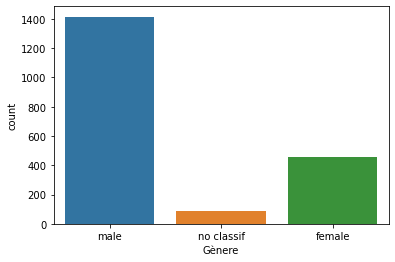

In [9]:
#intentem fer una representació amb seaborn
sns.countplot(x='Gènere',data=non_duplicate)